<a href="https://colab.research.google.com/github/CateMerfeld/class_work/blob/main/deep_learning_challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
from tensorflow.keras.datasets import fashion_mnist
!pip install tensorflow-gpu==2.0.0-rc1
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import warnings
warnings.filterwarnings('ignore')

from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import pandas as pd
from keras.layers import  Conv2D, MaxPooling2D

# Preprocess your data so that you can feed it into ANN models. Split your data into training and test sets:
---
This dataset is already separated into training and testing when we load it. See preprocessing below. 

In [2]:
# load data and preprocess
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [10]:
X_train.shape

(60000, 28, 28)

In [12]:
# 28*28 = dimensions of each image
input_dim = 784 
# dataset documentation specifies that there are 10 classes
output_dim = nb_classes = 10

# reshape images so they can be fed into model
X_train = X_train.reshape(60000, input_dim)
X_test = X_test.reshape(10000, input_dim)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

# Try different ANN models and train them on your training set:
---
You can play with the following:

* Number of layers
* Activation functions of the layers
* Number of neurons in the layers
* Different batch sizes during training

**Compare your models' training scores and interpret your results.**

**Evaluate how your models perform on your test set. Compare the results of your models.**

In [13]:
# one-hot encode target variable using to_categorical()
y_train = to_categorical(y_train, nb_classes)
y_test = to_categorical(y_test, nb_classes)

Starting with a very simple model. 

In [40]:
# create a model object
model = Sequential()

# add layers to the model
# first dense layer
model.add(Dense(64, input_shape=(784,), activation='tanh'))
# second dense layer
model.add(Dense(64, activation='tanh'))
# output layer
model.add(Dense(10, activation='softmax'))

In [41]:
# define an optimizer and compile model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

batch_size = 80
epochs = 20

# fit model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=batch_size, epochs=epochs, verbose=1)

Epoch 1/20
750/750 [==============================] - 2s 3ms/step - loss: 0.7180 - accuracy: 0.7542 - val_loss: 0.4228 - val_accuracy: 0.8466
Epoch 2/20
750/750 [==============================] - 2s 3ms/step - loss: 0.3834 - accuracy: 0.8621 - val_loss: 0.4041 - val_accuracy: 0.8515
Epoch 3/20
750/750 [==============================] - 2s 3ms/step - loss: 0.3537 - accuracy: 0.8700 - val_loss: 0.3805 - val_accuracy: 0.8612
Epoch 4/20
750/750 [==============================] - 2s 2ms/step - loss: 0.3275 - accuracy: 0.8820 - val_loss: 0.3562 - val_accuracy: 0.8705
Epoch 5/20
750/750 [==============================] - 2s 3ms/step - loss: 0.2981 - accuracy: 0.8910 - val_loss: 0.3557 - val_accuracy: 0.8713
Epoch 6/20
750/750 [==============================] - 2s 2ms/step - loss: 0.2886 - accuracy: 0.8946 - val_loss: 0.3529 - val_accuracy: 0.8722
Epoch 7/20
750/750 [==============================] - 2s 3ms/step - loss: 0.2766 - accuracy: 0.8997 - val_loss: 0.3407 - val_accuracy: 0.8786
Epoch 

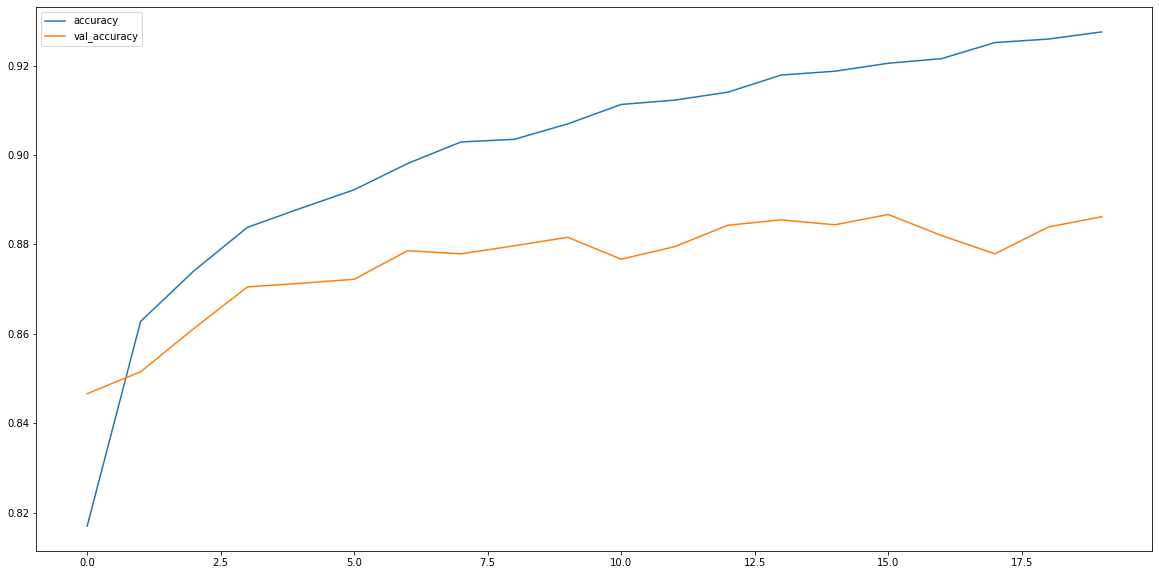

In [42]:
df = pd.DataFrame(history.history)
df[['accuracy', 'val_accuracy']].plot(figsize=(20,10))
plt.show()

This model comes in at about 92% accuracy for the training set and about 88% for the testing set. We're not seeing enormous loss for either set.

I'll try this same model with an additional layer and a different batch size.

In [43]:
# create a model object
model = Sequential()

# add layers to the model
# first dense layer
model.add(Dense(64, input_shape=(784,), activation='tanh'))
# second dense layer
model.add(Dense(64, activation='tanh'))
# third dense layer
model.add(Dense(32, activation='tanh'))
# output layer
model.add(Dense(10, activation='softmax'))

# define an optimizer and compile model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

batch_size = 120
epochs = 20

# fit model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=batch_size, epochs=epochs, verbose=1)

Epoch 1/20
500/500 [==============================] - 2s 3ms/step - loss: 0.8030 - accuracy: 0.7329 - val_loss: 0.4397 - val_accuracy: 0.8454
Epoch 2/20
500/500 [==============================] - 1s 3ms/step - loss: 0.4031 - accuracy: 0.8559 - val_loss: 0.3936 - val_accuracy: 0.8565
Epoch 3/20
500/500 [==============================] - 1s 3ms/step - loss: 0.3528 - accuracy: 0.8741 - val_loss: 0.3780 - val_accuracy: 0.8653
Epoch 4/20
500/500 [==============================] - 1s 3ms/step - loss: 0.3271 - accuracy: 0.8812 - val_loss: 0.3632 - val_accuracy: 0.8702
Epoch 5/20
500/500 [==============================] - 1s 3ms/step - loss: 0.3051 - accuracy: 0.8877 - val_loss: 0.3571 - val_accuracy: 0.8727
Epoch 6/20
500/500 [==============================] - 1s 3ms/step - loss: 0.2938 - accuracy: 0.8929 - val_loss: 0.3586 - val_accuracy: 0.8714
Epoch 7/20
500/500 [==============================] - 1s 3ms/step - loss: 0.2883 - accuracy: 0.8941 - val_loss: 0.3404 - val_accuracy: 0.8789
Epoch 

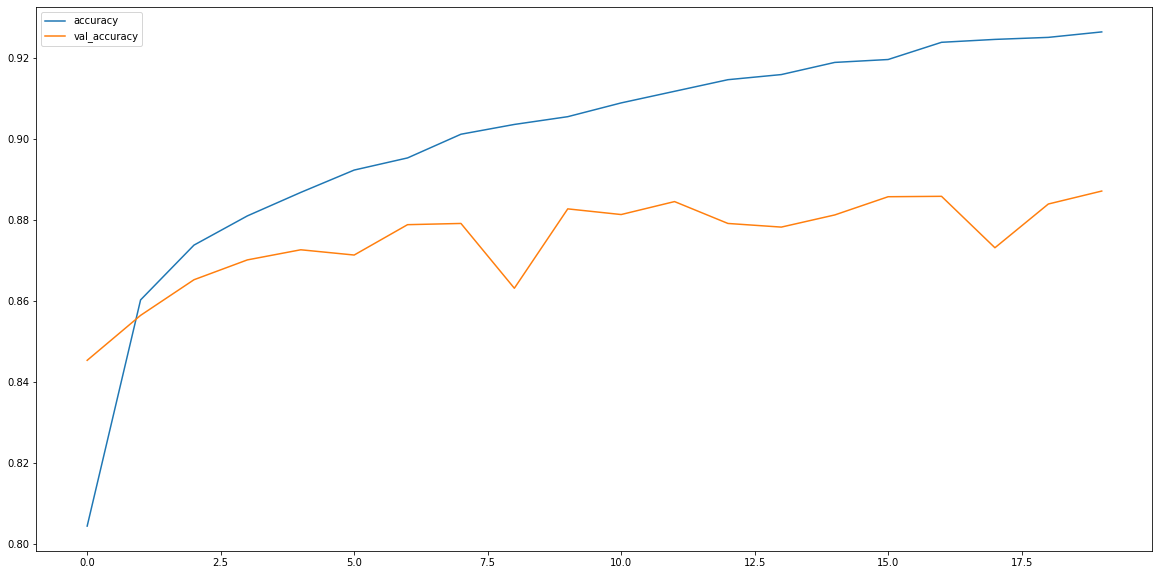

In [44]:
df = pd.DataFrame(history.history)
df[['accuracy', 'val_accuracy']].plot(figsize=(20,10))
plt.show()

The scores for this model are very similar. We saw a slight increase in loss and decrease in accuracy for the training set, and a slight change in the other direction for the test set. 

I'll try changing the model from above to use `relu` activation and different numbers of neurons in the layers.

In [46]:
# create a model object
model = Sequential()

# add layers to the model
# first dense layer
model.add(Dense(256, input_shape=(784,), activation='relu'))
# second dense layer
model.add(Dense(128, activation='relu'))
# third dense layer
model.add(Dense(64, activation='relu'))
# output layer
model.add(Dense(10, activation='softmax'))

# define an optimizer and compile model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

batch_size = 120
epochs = 20

# fit model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=batch_size, epochs=epochs, verbose=1)

Epoch 1/20
500/500 [==============================] - 2s 3ms/step - loss: 0.7192 - accuracy: 0.7488 - val_loss: 0.4208 - val_accuracy: 0.8523
Epoch 2/20
500/500 [==============================] - 1s 3ms/step - loss: 0.3892 - accuracy: 0.8597 - val_loss: 0.3834 - val_accuracy: 0.8558
Epoch 3/20
500/500 [==============================] - 2s 3ms/step - loss: 0.3416 - accuracy: 0.8757 - val_loss: 0.3873 - val_accuracy: 0.8574
Epoch 4/20
500/500 [==============================] - 1s 3ms/step - loss: 0.3076 - accuracy: 0.8856 - val_loss: 0.3452 - val_accuracy: 0.8704
Epoch 5/20
500/500 [==============================] - 1s 3ms/step - loss: 0.2863 - accuracy: 0.8944 - val_loss: 0.3370 - val_accuracy: 0.8762
Epoch 6/20
500/500 [==============================] - 1s 3ms/step - loss: 0.2695 - accuracy: 0.8992 - val_loss: 0.3338 - val_accuracy: 0.8830
Epoch 7/20
500/500 [==============================] - 2s 3ms/step - loss: 0.2650 - accuracy: 0.9017 - val_loss: 0.3191 - val_accuracy: 0.8861
Epoch 

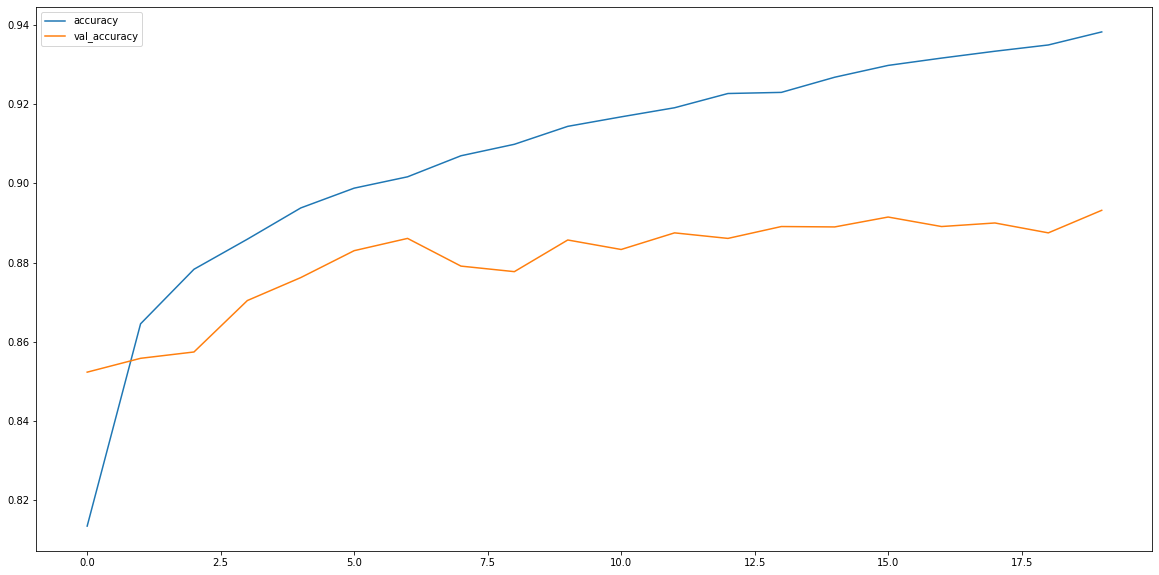

In [47]:
df = pd.DataFrame(history.history)
df[['accuracy', 'val_accuracy']].plot(figsize=(20,10))
plt.show()

This model has improved accuracy in both the training and test set. The test loss was slightly higher than in the last model, so I won't try adjusting more in this direction. 

This model performs better than the other two, although the differences are slight. 